The use of Decision Tree ML for language Detection. 

Here are the REQUIREMENTS OF THE MODEL. 1. Accuracy in language detection..... 2. Very high prediction speed..... 3. Accepting false negatives and avoids false positives ...... 4.Ability to predict multiple languages in a sentence ..... 5. Robustness and noise vairiabiltiy

Importing the functions that are needed for the model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

Loading the dataset
.....Using tokenization and Removing stopwords as a form of data analysis

In [3]:
# Import the data
df = pd.read_csv('/Users/elvisechefu/Desktop/language detection/languages.csv')

X = df['text']
y = df['language']

# Tokenization
def tokenize(text):
    return nltk.word_tokenize(text)

# Removing Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

df.head(5)

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german


Implementing Non-Alphabetical Pre-processing function

In [4]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    words = tokenize(text)
    words = remove_stopwords(words)
    return ' '.join(words)

FEATURE EXTRACTION ... (TI-IDFVectorizer)

In [5]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

DATA PIPELINE

In [23]:
# Define Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Define full pipeline
pipeline = Pipeline([
    ('preprocess', FunctionTransformer(lambda x:  [preprocess(text) for text in x])),
    ('vectorizer', vectorizer),
    ('decision_tree', decision_tree_classifier)
])

SPLITTING THE DATASET : TRAIN, VALIDATE AND TEST SETS

In [24]:
# Split data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

PRINTING THE SHAPES TO FURTHER UNDERSTAND THE SPLITING

In [26]:
# Print the shapes of the resulting sets
print("Shape of X_train_combined:", X_train.shape)
print("Shape of y_train_combined:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_combined: (458210,)
Shape of y_train_combined: (458210,)
Shape of X_val: (152737,)
Shape of y_val: (152737,)
Shape of X_test: (152737,)
Shape of y_test: (152737,)


TRAINING THE PIPELINE WITH THE TRAIN DATASET

In [27]:
# Convert 'text' column to string values
#X_train = X_train.astype(str)

# Fit pipeline to training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function <lambda> at 0x16cdf3c40>)),
                ('vectorizer', TfidfVectorizer(max_features=1000)),
                ('decision_tree', DecisionTreeClassifier())])

PREDICTING THE VALUES OF THE TRAINING SET

In [29]:
# Predict labels for the training set
y_train_pred = pipeline.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.9785796905349076


CALCULATING THE METRICS OF THE TRAIN SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [32]:
# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Compute precision
precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score for the test set
f1_test = f1_score(y_train, y_train_pred, average='weighted')
print("F1-score (Test):", f1_test)

Train Accuracy: 0.9785796905349076
Precision: 0.9789422602378051
Recall: 0.9785796905349076
F1-score (Test): 0.9785289334549989


CALCULATE METRICS OF THE VALIDATE SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [33]:
# Predict labels for the validation set
y_val_pred = pipeline.predict(X_val)

# Compute accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Compute precision
precision = precision_score(y_val, y_val_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_val, y_val_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score for the test set
f1_test = f1_score(y_val, y_val_pred, average='weighted')
print("F1-score (Test):", f1_test)

Validation Accuracy: 0.9735034732906892
Precision: 0.973758463027128
Recall: 0.9735034732906892
F1-score (Test): 0.9734018227601929


CALCULATE METRICS OF THE TEST SET: ACCURACY, RECALL, PRECISION AND F1-SCORE

In [34]:
# Predict labels for the test set
y_test_pred = pipeline.predict(X_test)

# Compute accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Compute precision for the test set
precision_test = precision_score(y_test, y_test_pred, average='weighted')
print("Precision (Test):", precision_test)

# Compute recall for the test set
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print("Recall (Test):", recall_test)

# Compute F1-score for the test set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("F1-score (Test):", f1_test)


Test Accuracy: 0.9733856236537316
Precision (Test): 0.973647674089101
Recall (Test): 0.9733856236537316
F1-score (Test): 0.9732811604399171


LEARNING CURVE 

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1


# Define a function to plot learning curves
def plot_learning_curves(train_sizes, train_scores, val_scores, test_scores, metric):
    plt.plot(train_sizes, train_scores, label='Train')
    plt.plot(train_sizes, val_scores, label='Validation')
    plt.plot(train_sizes, test_scores, label='Test')
    plt.xlabel('Training Size')
    plt.ylabel(metric)
    plt.title(f'Learning Curve - {metric}')
    plt.legend()
    plt.show()

# Define a function to train the model with varying training sizes
def train_with_varying_sizes(X_train, y_train, X_val, y_val, X_test, y_test, sizes):
    train_accuracies, val_accuracies, test_accuracies = [], [], []
    train_precisions, val_precisions, test_precisions = [], [], []
    train_recalls, val_recalls, test_recalls = [], [], []
    train_f1s, val_f1s, test_f1s = [], [], []

    for size in sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
        pipeline.fit(X_train_subset, y_train_subset)

        y_train_pred = pipeline.predict(X_train_subset)
        y_val_pred = pipeline.predict(X_val)
        y_test_pred = pipeline.predict(X_test)
        
        train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(y_train_subset, y_train_pred)
        val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(y_val, y_val_pred)
        test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        test_precisions.append(test_precision)

        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        test_recalls.append(test_recall)

        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        test_f1s.append(test_f1)
        
    return (train_accuracies, val_accuracies, test_accuracies), \
           (train_precisions, val_precisions, test_precisions), \
           (train_recalls, val_recalls, test_recalls), \
           (train_f1s, val_f1s, test_f1s)
    
# Define the sizes of the training subsets
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train the model with varying training sizes
accuracy_scores, precision_scores, recall_scores, f1_scores = train_with_varying_sizes(X_train, y_train, X_val, y_val, X_test, y_test, train_sizes)

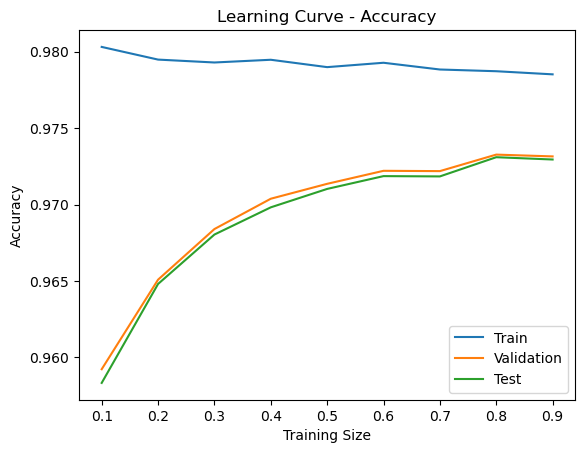

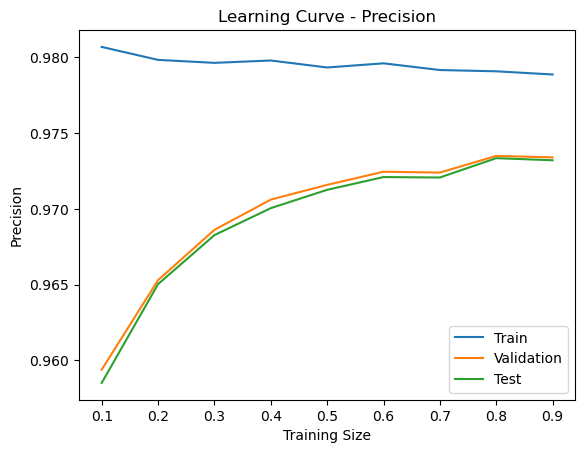

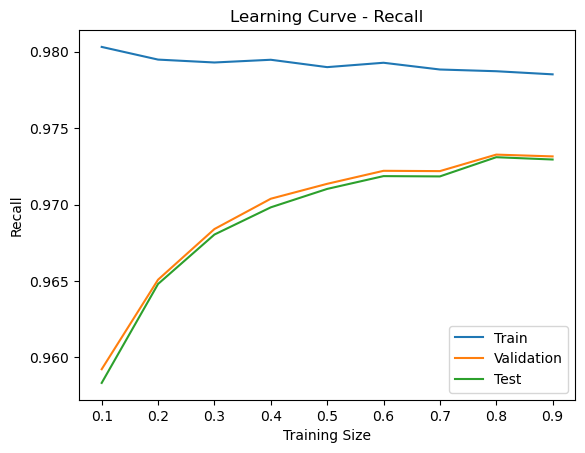

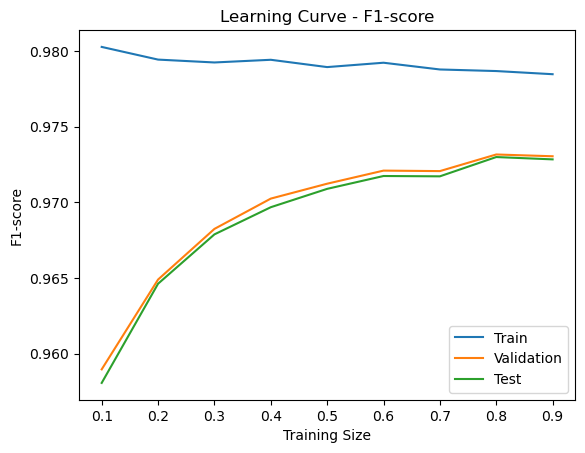

In [37]:
# Plot learning curves for each metric
plot_learning_curves(train_sizes, accuracy_scores[0], accuracy_scores[1], accuracy_scores[2], 'Accuracy')
plot_learning_curves(train_sizes, precision_scores[0], precision_scores[1], precision_scores[2], 'Precision')
plot_learning_curves(train_sizes, recall_scores[0], recall_scores[1], recall_scores[2], 'Recall')
plot_learning_curves(train_sizes, f1_scores[0], f1_scores[1], f1_scores[2], 'F1-score')

CONFRIMING THE REQUIREMENT ACCEPTING FALSE NEGATIVES AND AVOIDING FALSE POSITIVES

USING A CONFUSION MATRIX To provide information on the model's performance in terms of true positives, false positives, true negatives, and false negatives

In [39]:
from sklearn.metrics import confusion_matrix

# Predict labels for the validation set
y_val_pred = pipeline.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[55075    23    40    43]
 [  690 32447    35   930]
 [  495    29 39284    85]
 [ 1136   554    41 21830]]


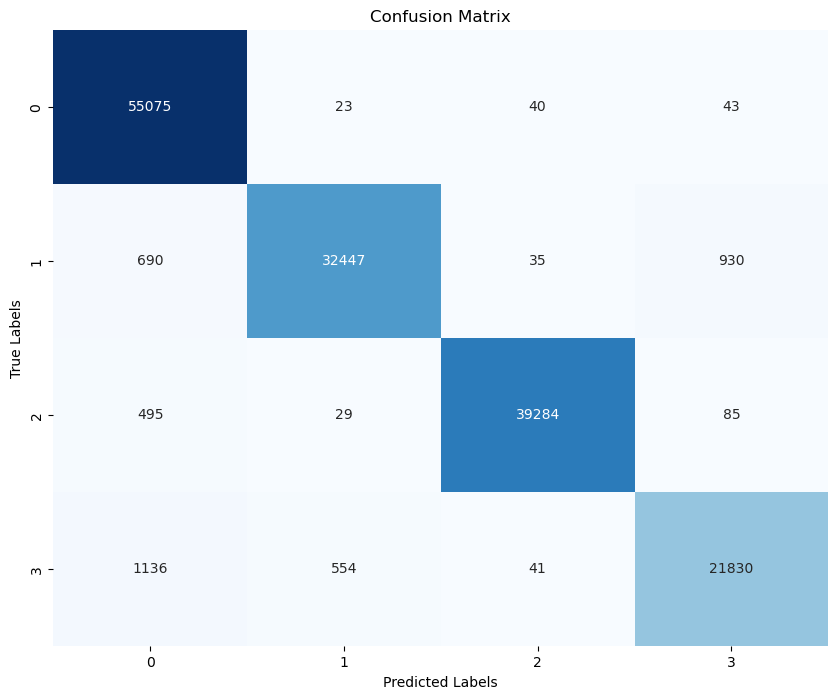

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


CONFRIMATION OF FALSE NEGATIVES AND AVOIDS FALSE POSITIVES

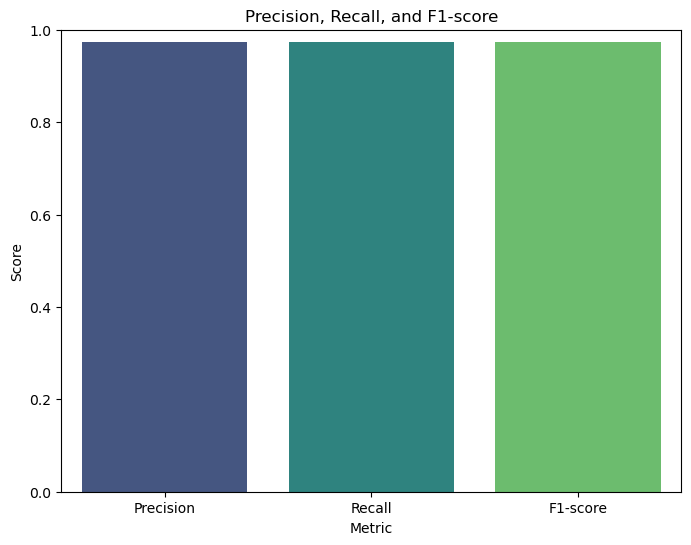

In [42]:
# Compute precision, recall, and F1-score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Create a bar plot
scores = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1-score']
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=scores, palette='viridis')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.title('Precision, Recall, and F1-score')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


TESTING THE PREDICTION SPEED AND ACCURACY

In [43]:
# Predict language for a new text
text_to_predict = "C'est une bonne journée pour apprendre le français."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

Predicted Language: french


In [44]:
# Predict language for a new text
text_to_predict = "Die Komplexität der globalen Finanzmärkte erfordert eine differenzierte Analyse und ein tiefgreifendes Verständnis der wirtschaftlichen Zusammenhänge. Investoren müssen sowohl makroökonomische Trends als auch mikroökonomische Variablen berücksichtigen, um fundierte Entscheidungen zu treffen und Risiken zu minimieren."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

Predicted Language: german


In [45]:
# Predict language for a new text
text_to_predict = "Hola, ¿cómo estás? Estoy bien, gracias. ¿Y tú? Me gustaría ir al parque esta tarde."
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

Predicted Language: spanish


In [47]:
# Predict language for a new text
text_to_predict = "Christ, what am i doing here. I should be on a yatch cruise in the middle of nowhere "
preprocessed_text = preprocess(text_to_predict)
predicted_language = pipeline.predict([preprocessed_text])[0]

print("Predicted Language:", predicted_language)

Predicted Language: english
